# Projet : Forage de données IFT870

**Groupe 4**

|  Prénom  |    Nom   |    CIP   |  Matricule |
|----------|----------|----------|------------|
| Honorine | Chantre  | CHAH2807 | 21 117 462 |
| Manon    | Cottart  | COTM3313 | 21 126 210 |
| Lucas    | Gonthier | GONL3002 | 21 155 376 |
| Étienne  | Penelle  | PENE2002 | 16 114 642 |





# Description des données

Ce notebook recense le code effectué pour les graphiques utilisés dans notre Partie 1 - Description des données. Ces graphiques permettent avant tout une visualisation préliminaire. Ce notebook est temporaire et est sujet à modifications, son contenu (ou une partie) sera ensuite intégré au code source du projet.

### Installation des dépendances

In [ ]:
!pip install -r requirements.txt


### Obtention des données
#### Format png
Il faut aller chercher les images de couleur à l'endroit suivant :
https://www.kaggle.com/denizkavi1/brain-tumor

Ensuite, il faut décompresser le fichier et placer le contenu dans
```dataset/png```.

#### Format mat
Il faut aller chercher les données d'images à l'endroit suivant :
https://figshare.com/articles/dataset/brain_tumor_dataset/1512427/5
Ensuite, il faut décompresser tous les fichiers et tout placer le contenu dans
```dataset/mat```.


### Imports

In [6]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from pymatreader import read_mat


# On se demande pourquoi pip install en windows powershell ne l'installe pas.
# !pip install pymatreader 

### Distribution de chaque classe

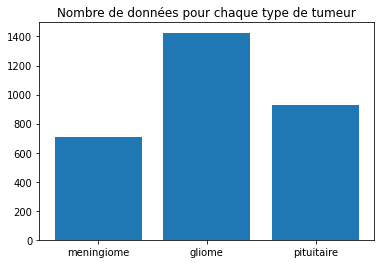

In [7]:
nb_per_class = []
class_nb = [1, 2, 3]
class_names = ['meningiome', 'gliome', 'pituitaire']
for i in range(len(class_nb)):
    count = 0
    dir = "dataset/png/" + str(class_nb[i])
    for path in os.listdir(dir):
        if os.path.isfile(os.path.join(dir, path)):
            count += 1
    nb_per_class.append(count)

plt.bar(class_names, height=nb_per_class)
plt.title('Nombre de données pour chaque type de tumeur')
plt.show()

### Affichage d'une image au format .mat

#### On visualise une image de chaque classe de tumeur

{'cjdata': {'PID': '104019', 'label': 3.0, 'tumorMask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'image': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 2, 5, ..., 6, 2, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'tumorBorder': array([243.51219512, 302.38327526, 256.        , 302.38327526,
       268.48780488, 300.59930314, 274.73170732, 298.81533101,
       265.81184669, 288.11149826, 263.1358885 , 282.75958188,
       265.81184669, 280.08362369, 274.73170732, 274.73170732,
       270.271777  , 265.81184669, 256.        , 265.81184669,
       247.97212544, 271.16376307, 241.728223  , 280.97560976,
       241.728223  , 285.43554007, 232.80836237, 288.11149826,
       225.67247387, 294.3554007 , 227.45

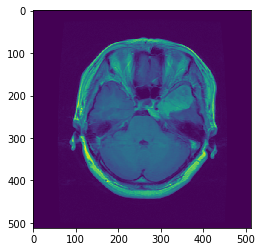

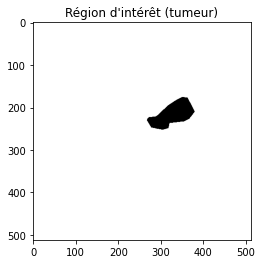

In [30]:
mat1 = read_mat('dataset/mat/1.mat')
print(mat)
plt.imshow(mat1["cjdata"]['image'], interpolation='nearest')
print('Etiquette de l''image : ', class_names[int(mat1["cjdata"]["label"]-1)])
plt.show()

plt.imshow(mat1['cjdata']['tumorMask'], cmap='Greys')
plt.title('Région d\'intérêt (tumeur)')
plt.show()

Etiquette de limage :  gliome


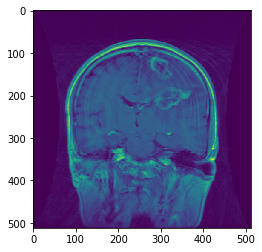

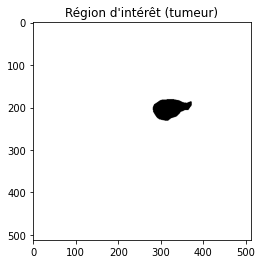

In [29]:
mat2 = read_mat('dataset/mat/800.mat')
# print(mat)
plt.imshow(mat2["cjdata"]['image'], interpolation='nearest')
print('Etiquette de l''image : ', class_names[int(mat2["cjdata"]["label"]-1)])

plt.show()

plt.imshow(mat2['cjdata']['tumorMask'], cmap='Greys')
plt.title('Région d\'intérêt (tumeur)')
plt.show()

Etiquette de limage :  pituitaire


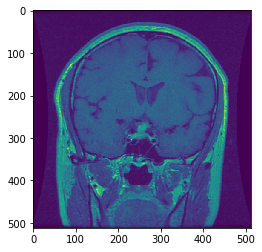

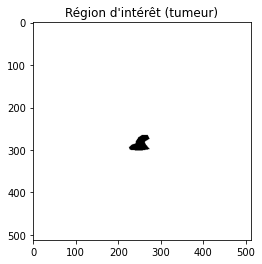

In [25]:
mat3 = read_mat('dataset/mat/1533.mat')
# print(mat)
plt.imshow(mat3["cjdata"]['image'], interpolation='nearest')
print('Etiquette de l''image : ', class_names[int(mat3["cjdata"]["label"]-1)])

plt.show()

plt.imshow(mat3['cjdata']['tumorMask'], cmap='Greys')
plt.title('Région d\'intérêt (tumeur)')
plt.show()

#### Visualisation d'une deuxième image

Etiquette de limage :  meningiome


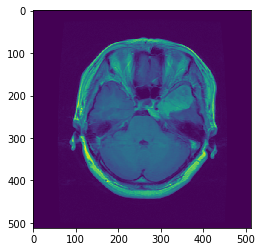

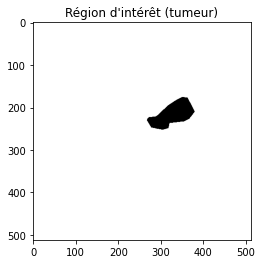

In [24]:
mat2 = read_mat('dataset/mat/1.mat')
# print(mat)
plt.imshow(mat2["cjdata"]['image'], interpolation='nearest')
print('Etiquette de l''image : ', class_names[int(mat2["cjdata"]["label"]-1)])
plt.show()

plt.imshow(mat2['cjdata']['tumorMask'], cmap='Greys')
plt.title('Région d\'intérêt (tumeur)')
plt.show()

### Affichage de la distribution de chaque canal pour 3 images de classe différente

(512, 512, 4)
255
1
[ 68   1  84 255]


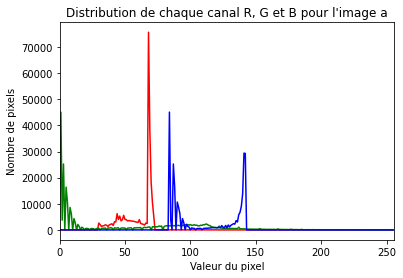

In [10]:
image = io.imread('dataset/png/1/2302.png')

print(image.shape)
print(image.max())
print(image.min())
print(image[0,0,:])


colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Distribution de chaque canal R, G et B pour l'image a")
plt.xlabel("Valeur du pixel")
plt.ylabel("Nombre de pixels")
plt.show()


(512, 512, 4)
255
1
[ 68   1  84 255]


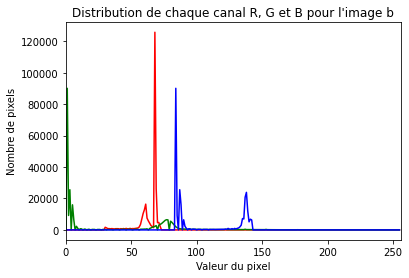

In [11]:
image = io.imread('dataset/png/2/1076.png')

print(image.shape)
print(image.max())
print(image.min())
print(image[0,0,:])


colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Distribution de chaque canal R, G et B pour l'image b")
plt.xlabel("Valeur du pixel")
plt.ylabel("Nombre de pixels")

plt.show()

(512, 512, 4)
255
1
[ 68   1  84 255]


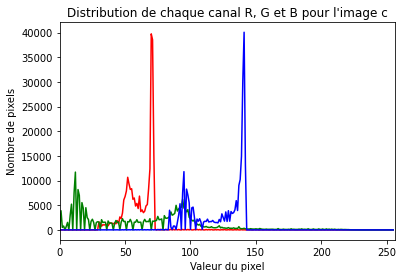

In [12]:
image = io.imread('dataset/png/3/1024.png')

print(image.shape)
print(image.max())
print(image.min())
print(image[0,0,:])


colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Distribution de chaque canal R, G et B pour l'image c")
plt.xlabel("Valeur du pixel")
plt.ylabel("Nombre de pixels")

plt.show()

### Affichage de la distribution de chaque canal toutes les données par classe
Répétons maintenant l'exercice en affichant l'histogramme d'intensité pour toutes les images de chaque classe.

#### Import images

In [13]:
meningioma = io.imread_collection('dataset/png/1/*.png', conserve_memory=True)
glioma = io.imread_collection('dataset/png/2/*.png', conserve_memory=True)
pituitary = io.imread_collection('dataset/png/3/*.png', conserve_memory=True)

In [18]:
def generate_histogram(imgs, do_print, hist_title):
    """
    @params: img: Batch of color images. We calculate the Normalized histogram of this batch.
    @params: do_print: if or not print the result histogram
    @return: will return the rgb histogram
    """
    red_hist = np.zeros([256])
    green_hist = np.zeros([256])
    blue_hist = np.zeros([256])
    
    for img in imgs:
        # print(img.shape)
        for x_pixel in range(img.shape[0]):
            for y_pixel in range(img.shape[1]):
                red_pixel_value = int(img[x_pixel, y_pixel, 0])
                green_pixel_value = int(img[x_pixel, y_pixel, 1])
                blue_pixel_value = int(img[x_pixel, y_pixel, 2])
                
                red_hist[red_pixel_value] += 1
                green_hist[green_pixel_value] += 1
                blue_hist[blue_pixel_value] += 1
            
    if do_print:
        print_histogram(red_hist, green_hist, blue_hist, title=hist_title)
    return red_hist, green_hist, blue_hist
  
def print_histogram(red_histrogram, green_histogram, blue_histogram, title):
    plt.figure()
    plt.title(title)
    plt.plot(red_histrogram, color='#ef476f')
    plt.plot(green_histogram, color='#34eb40')
    plt.plot(blue_histogram, color='#344feb')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig('out/' + title)

In [ ]:
Cette opération peut être assez longue, car il faut parcourir toutes les images du dataset.

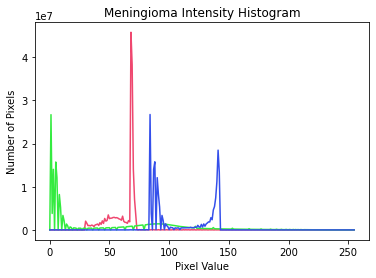

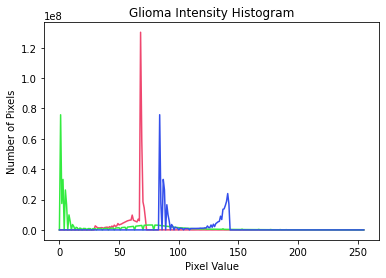

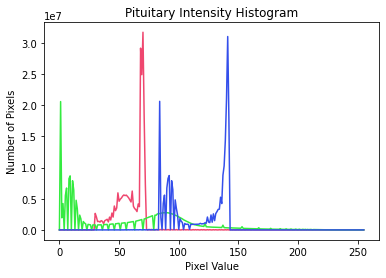

In [ ]:
meningioma_red_hist, meningioma_green_hist, meningioma_blue_hist = generate_histogram(meningioma, True, hist_title='Meningioma Intensity Histogram')
glioma_red_hist, glioma_green_hist, glioma_blue_hist = generate_histogram(glioma, True, hist_title='Glioma Intensity Histogram')
pituitary_red_hist, pituitary_green_hist, pituitary_blue_hist = generate_histogram(pituitary, True, hist_title='Pituitary Intensity Histogram')

